# 101에서 110까지 구하기
## 0. 관련 모듈 불러오기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

## 1. 데이터 준비
#### 데이터와 정답(학습과 테스트)

In [2]:
x_train = np.array([1,2,3,4,5,6,7,8,9,10])
y_train = np.array([1,2,3,4,5,6,7,8,9,10])
x_test = np.array([101,102,103,104,105,106,107,108,109,110])
y_test = np.array([101,102,103,104,105,106,107,108,109,110])

# 2. 모델 구성
#### 모델 생성
* 얼마나 많은 레이어와 노드를 준비할 것인가 설계
* Dense(5, input_dim=1) : 1개의 입력으로 5개의 노드로 출력한다는 의미

In [3]:
model = Sequential()
#model.add(Dense(5, input_dim=1, activation='relu'))
model.add(Dense(5, input_dim=1))
model.add(Dense(3))
#model.add(Dense(1, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


## 3. 컴파일 및 훈련
#### 모델 컴파일
* 모델을 실행시키지 전에 머신이 이해할 수 있도록 컴파일 시킴

In [4]:
model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])

#### 모델 실행

In [5]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=1,validation_data = (x_test, y_test))

Train on 10 samples, validate on 10 samples
Epoch 1/100
10/10 [==============================] - 1s 53ms/sample - loss: 56.1187 - accuracy: 0.0000e+00 - val_loss: 15401.8818 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 3ms/sample - loss: 50.7202 - accuracy: 0.0000e+00 - val_loss: 14011.8236 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 3ms/sample - loss: 45.6910 - accuracy: 0.0000e+00 - val_loss: 12693.2737 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 3ms/sample - loss: 40.6267 - accuracy: 0.0000e+00 - val_loss: 11531.5354 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 3ms/sample - loss: 36.2957 - accuracy: 0.0000e+00 - val_loss: 10422.7247 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 3ms/sample - loss: 32.2122 - accuracy: 0.0000e+00 - val_loss: 9385.0210 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [=

10/10 [==============================] - 0s 3ms/sample - loss: 0.1129 - accuracy: 0.1000 - val_loss: 106.1517 - val_accuracy: 0.0000e+00
Epoch 55/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.1113 - accuracy: 0.1000 - val_loss: 107.7167 - val_accuracy: 0.0000e+00
Epoch 56/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.1103 - accuracy: 0.1000 - val_loss: 106.8679 - val_accuracy: 0.0000e+00
Epoch 57/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.1088 - accuracy: 0.1000 - val_loss: 104.5029 - val_accuracy: 0.0000e+00
Epoch 58/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.1078 - accuracy: 0.1000 - val_loss: 104.6913 - val_accuracy: 0.0000e+00
Epoch 59/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.1068 - accuracy: 0.1000 - val_loss: 101.0577 - val_accuracy: 0.0000e+00
Epoch 60/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.1060 - accuracy: 0.1000 - val_loss:

#### 그래프 확인

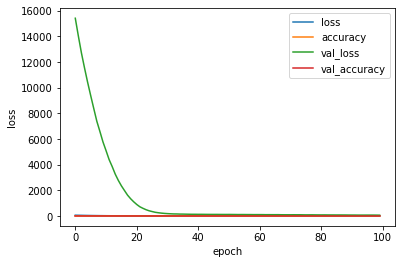

In [6]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
#plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'], loc='upper right')
plt.show()

## 4. 평가 및 예측
#### 모델 평가

In [7]:
loss, acc = model.evaluate(x_test, y_test, batch_size=1)
print("loss :", loss)
print("acc :", acc)

10/10 [==============================] - 0s 3ms/sample - loss: 57.5996 - accuracy: 0.0000e+00
loss : 57.59963760375977
acc : 0.0


#### 예측하기

In [8]:
output = model.predict(x_test)
print("결과물 : \n", output)

결과물 : 
 [[ 93.76017 ]
 [ 94.68319 ]
 [ 95.606224]
 [ 96.52924 ]
 [ 97.45226 ]
 [ 98.3753  ]
 [ 99.29832 ]
 [100.22134 ]
 [101.14436 ]
 [102.06739 ]]
